<a href="https://colab.research.google.com/github/TravisJRCain/Olympics-Project/blob/master/Travis_Cain_Olympics_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#### Initial notes and thoughts on data/project ####

# - Given data covering multiple aspects of an athlete’s life
# - Goal: Create reports to appeal to the differing stakeholders
#     - Identify and answer a question that I believe intriguing to a coach 
#     - or sport science provider
# - Use any analytical tools
# - Options for achieving this goal:
#     - observe an innovative insight from the data
#     - create an end of season report that helps staff for next season
#     - develop an interactive solution that allows stockholders to explore 
#     - the data

# Personal thoughts on how to go about this:
# - Initially explore/observe data
#     - History of injury
# - Try to find trends within data
#     - Anything that stands out
# - Create hypotheses
# - Some important data types in Mock_Wellness_data.csv

# Potential hypotheses/questions:
# - Are there any potential reasons as to why athletes get injured more?
# - Is being “injury prone” a real thing?
#     - Number of injuries (mock_history_of_injury.csv)
#     - Type (mock_history_of_injury.csv)
#     - Current_Status (mock_history_of_injury.csv)
#     - InjuryFirstTimeReport (mock_load_data.csv)
#     - Illness/InjuryReport (mock_load_data.csv)
# - What is the most common type of injury? (ehh)
#     - Do specific injuries lead to other specific injuries?
# - Do certain sports have a higher chance of more injuries?
#     - Mock_Self_Reported_Health.csv has a “sport” data
# - Do certain locations have a higher chance of injury?
#     - Mock_Travel_Location_Data.csv has location

# DS side of things:
# - Look at categories and create numerical values for specific 
# - trends/categories and run ML algorithms on them
# - Merge datasets by athlete numbers
# - Figure out what datasets to work with
#     - Mock_Wellness_data.csv
#     - Mock_History_of_Injury.csv
#     - Mock_load_data.csv
#     - Mock_Self_Reported_Health.csv
#     - Mock_Travel_Location_Data.csv (for location only)
# - One-Hot encoding??
# Use ML algorithm

In [52]:
##### Final Hypothesis: Is being "injury prone" a myth? #####

# Which factors have the highest correlation with getting injured?

# Data I want to look at = amount of injuries, cause of injury, sport, fatigue,
# stress, and readiness based on the athlete

In [243]:
# import pandas, numpy and various libraries

import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [244]:
# loading data

df = pd.read_csv('/content/Mock_Wellness_Data.csv')

In [245]:
# exploring data

df.head()

,Athlete,Team,Survey_Completed,Date_New,DayOfEntry,DayOfEntry_TEXT,Sleep_Hours,Nap_Hours,Sleep_Quality,Fatigue,Soreness,Stress,Readiness,Motivation,Wellness/Load
0,Athlete 61,Team 1,1/7/2019 9:27,NaN,1.0,NaN,7.0,0.5,85,17,27,92,100,83,Wellness
1,Athlete 506,Team 2,1/7/2019 9:57,NaN,1.0,NaN,5.6,0.2,51,6,3,96,46,68,Wellness
2,Athlete 289,Team 1,1/7/2019 10:26,NaN,1.0,NaN,8.0,0.0,55,28,13,51,72,74,Wellness
3,Athlete 530,Team 2,1/7/2019 10:32,NaN,1.0,NaN,7.5,0.0,100,0,0,100,0,100,Wellness
4,Athlete 25,Team 2,1/7/2019 10:52,NaN,1.0,NaN,9.0,0.0,60,0,15,100,33,62,Wellness


In [246]:
df['Sleep_Hours'].mean()

7.530250799876214

In [247]:
df['Athlete'].mode()

0    Athlete 323
dtype: object

In [248]:
# add second dataset

df2 = pd.read_csv('/content/Mock_Self_Reported_Health.csv')

In [249]:
df2.head()

,athlete,date,injury_first,illness_first,injury_body_part,injury_side,illness_system,sport,emr_documented,orchard_code
0,Athlete 29,7/9/2020,NaN,Yes,NaN,NaN,Musculo-skeletal,BOB,Y,Illness
1,Athlete 491,7/9/2020,Yes,NaN,Knee,Left,NaN,ATH,Y,KTQT
2,Athlete 148,7/1/2020,Yes,NaN,Shoulder/clavicle,Left,NaN,ATH,Y,SZXX
3,Athlete 447,7/1/2020,Yes,NaN,Anterior thigh,Left,NaN,ATH,Y,KJMX
4,Athlete 430,6/26/2020,Yes,NaN,Shoulder/clavicle,Left,NaN,SWI,Y,Basic Complaint


In [250]:
# rename athlete to Athlete for merging

df2 = df2.rename(columns={'athlete':'Athlete'})

In [251]:
df2['Athlete']

0        Athlete 29
1       Athlete 491
2       Athlete 148
3       Athlete 447
4       Athlete 430
           ...     
1285    Athlete 515
1286    Athlete 544
1287     Athlete 92
1288     Athlete 97
1289     Athlete 98
Name: Athlete, Length: 1290, dtype: object

In [252]:
# merge datasets together

df3 = pd.merge(df, df2, on='Athlete', how='inner')

In [253]:
df3.head()

,Athlete,Team,Survey_Completed,Date_New,DayOfEntry,DayOfEntry_TEXT,Sleep_Hours,Nap_Hours,Sleep_Quality,Fatigue,Soreness,Stress,Readiness,Motivation,Wellness/Load,date,injury_first,illness_first,injury_body_part,injury_side,illness_system,sport,emr_documented,orchard_code
0,Athlete 61,Team 1,1/7/2019 9:27,NaN,1.0,NaN,7.0,0.5,85,17,27,92,100,83,Wellness,9/25/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",ATH,Y,Illness
1,Athlete 61,Team 1,1/8/2019 8:22,NaN,1.0,NaN,8.1,0.0,92,0,26,100,80,86,Wellness,9/25/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",ATH,Y,Illness
2,Athlete 61,Team 1,1/9/2019 7:07,NaN,1.0,NaN,7.0,0.0,26,59,6,100,97,72,Wellness,9/25/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",ATH,Y,Illness
3,Athlete 61,Team 1,1/10/2019 9:47,NaN,1.0,NaN,7.1,0.0,62,24,0,61,90,50,Wellness,9/25/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",ATH,Y,Illness
4,Athlete 61,Team 1,1/11/2019 7:34,NaN,1.0,NaN,8.0,0.0,85,38,21,74,80,92,Wellness,9/25/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",ATH,Y,Illness


In [254]:
df3.tail()

,Athlete,Team,Survey_Completed,Date_New,DayOfEntry,DayOfEntry_TEXT,Sleep_Hours,Nap_Hours,Sleep_Quality,Fatigue,Soreness,Stress,Readiness,Motivation,Wellness/Load,date,injury_first,illness_first,injury_body_part,injury_side,illness_system,sport,emr_documented,orchard_code
56860,Athlete 227,Team 1,8/31/2020 9:41,8/31/2020,NaN,NaN,9.0,0.0,79,23,0,100,83,86,Wellness,3/8/2020,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",RUG,Y,Illness
56861,Athlete 227,Team 1,8/31/2020 9:41,8/31/2020,NaN,NaN,9.0,0.0,79,23,0,100,83,86,Wellness,12/24/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",ATH,Y,Illness
56862,Athlete 227,Team 1,8/31/2020 9:41,8/31/2020,NaN,NaN,9.0,0.0,79,23,0,100,83,86,Wellness,11/21/2019,NaN,Yes,NaN,NaN,Gastrointestinal system,ATH,Y,Illness
56863,Athlete 227,Team 1,8/31/2020 9:41,8/31/2020,NaN,NaN,9.0,0.0,79,23,0,100,83,86,Wellness,9/16/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",ATH,Y,Illness
56864,Athlete 227,Team 1,8/31/2020 9:41,8/31/2020,NaN,NaN,9.0,0.0,79,23,0,100,83,86,Wellness,8/3/2019,NaN,Yes,NaN,NaN,"Respiratory system/Ears, nose, and throat",SKI,Y,Illness


In [434]:
df3_clean = df3[['Athlete', 'Fatigue', 'Stress', 'Readiness', 'Motivation', 'Sleep_Hours']]

In [435]:
df3_clean.head()

,Athlete,Fatigue,Stress,Readiness,Motivation,Sleep_Hours
0,Athlete 61,17,92,100,83,7.0
1,Athlete 61,0,100,80,86,8.1
2,Athlete 61,59,100,97,72,7.0
3,Athlete 61,24,61,90,50,7.1
4,Athlete 61,38,74,80,92,8.0


In [436]:
df3_clean.shape

(56865, 6)

In [258]:
df3_clean.loc[df3_clean['Athlete'] == 'Athlete 227']

,Athlete,Fatigue,Stress,Readiness
55325,Athlete 227,17,51,86
55326,Athlete 227,17,51,86
55327,Athlete 227,17,51,86
55328,Athlete 227,17,51,86
55329,Athlete 227,17,51,86
...,...,...,...,...
56860,Athlete 227,23,100,83
56861,Athlete 227,23,100,83
56862,Athlete 227,23,100,83
56863,Athlete 227,23,100,83


In [320]:
df4 = pd.read_csv('/content/Mock_Self_Reported_Health.csv')

In [322]:
print(df4['date'].describe())
df4.head()

count          1290
unique          579
top       4/11/2018
freq              9
Name: date, dtype: object


,athlete,date,injury_first,illness_first,injury_body_part,injury_side,illness_system,sport,emr_documented,orchard_code
0,Athlete 29,7/9/2020,NaN,Yes,NaN,NaN,Musculo-skeletal,BOB,Y,Illness
1,Athlete 491,7/9/2020,Yes,NaN,Knee,Left,NaN,ATH,Y,KTQT
2,Athlete 148,7/1/2020,Yes,NaN,Shoulder/clavicle,Left,NaN,ATH,Y,SZXX
3,Athlete 447,7/1/2020,Yes,NaN,Anterior thigh,Left,NaN,ATH,Y,KJMX
4,Athlete 430,6/26/2020,Yes,NaN,Shoulder/clavicle,Left,NaN,SWI,Y,Basic Complaint


In [324]:
### change to month ###

df4['date'] = pd.DatetimeIndex(df4['date']).month

In [325]:
df4['date'].describe()

count    1290.000000
mean        6.593023
std         3.574904
min         1.000000
25%         3.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: date, dtype: float64

In [326]:
df4 = df4.rename(columns={'athlete':'Athlete'})
df4 = df4.rename(columns={'date':'Date'})

In [327]:
df4_clean = df4[['Date', 'Athlete', 'injury_first', 'sport']]

In [328]:
df4_clean.head()

,Date,Athlete,injury_first,sport
0,7,Athlete 29,NaN,BOB
1,7,Athlete 491,Yes,ATH
2,7,Athlete 148,Yes,ATH
3,7,Athlete 447,Yes,ATH
4,6,Athlete 430,Yes,SWI


In [266]:
df5 = pd.read_csv('/content/Mock_History_of_Injury.csv', header=0, encoding='unicode_escape') # sep='\t', engine='python')

In [329]:
print(df5['Date'].describe())
df5.head(10)

count     167.000000
mean     2015.634731
std         3.212099
min      2001.000000
25%      2014.500000
50%      2016.000000
75%      2018.000000
max      2019.000000
Name: Date, dtype: float64


,Date,Athlete,No_of_Injuries,Body_Part,Side,Type,Cause,Specific,Current_Status,Add_Details
0,2001,Athlete 438,1,Knee,NaN,Tendinitis/tendinopathy (tendon pain),Overuse,NaN,Fully recovered,patella tendinopathy - 3 months
1,2010,Athlete 373,1,Achilles tendon,NaN,Sprain (ligament injury),Acute/non-contact,NaN,Fully recovered,2 Months
2,2019,Athlete 254,1,Head,NaN,Concussion,Contact,NaN,Fully recovered,rest
3,2015,Athlete 299,2,Ankle,NaN,Post-surgical,Overuse,NaN,Fully recovered,Needed surgery to remove bone piece in ancle. ...
4,2017,Athlete 299,2,Shoulder/clavicle,NaN,Muscle soreness,Acute/non-contact,NaN,Fully recovered,"Stressed shoulder canoeing, took 2 weeks off t..."
5,2019,Athlete 112,2,Posterior thigh,NaN,Severe microtears in hamstring,Overuse,NaN,I still have symptoms and/or receive treatment,"Ongoing injury, has been almost 3 months, pain..."
6,2017,Athlete 112,2,Shoulder/clavicle,NaN,Not exactly sure what the injury was. Hypermob...,Overuse,NaN,Fully recovered,"treatment was rest, so official diagnosis, man..."
7,2008,Athlete 161,3,Lower back/lumbar spine,NaN,Ligament Rupture,Contact,NaN,Fully recovered,Muscle/ligament tear on sacrum/tailbone; could...
8,2011,Athlete 161,3,Ankle,NaN,Ligament Rupture,Acute/non-contact,NaN,Fully recovered,"Anterior talofibular ligament tear, rolled ank..."
9,2016,Athlete 161,3,Lower back/lumbar spine,NaN,Meniscus or cartilage lesion,Acute/non-contact,NaN,Fully recovered,"Moderate bulging disks L4-L5, L5-S1; unable to..."


In [268]:
df5['Date'] = pd.DatetimeIndex(df5['Date']).year

In [269]:
df5.head()

,Date,Athlete,No_of_Injuries,Body_Part,Side,Type,Cause,Specific,Current_Status,Add_Details
0,2001,Athlete 438,1,Knee,NaN,Tendinitis/tendinopathy (tendon pain),Overuse,NaN,Fully recovered,patella tendinopathy - 3 months
1,2010,Athlete 373,1,Achilles tendon,NaN,Sprain (ligament injury),Acute/non-contact,NaN,Fully recovered,2 Months
2,2019,Athlete 254,1,Head,NaN,Concussion,Contact,NaN,Fully recovered,rest
3,2015,Athlete 299,2,Ankle,NaN,Post-surgical,Overuse,NaN,Fully recovered,Needed surgery to remove bone piece in ancle. ...
4,2017,Athlete 299,2,Shoulder/clavicle,NaN,Muscle soreness,Acute/non-contact,NaN,Fully recovered,"Stressed shoulder canoeing, took 2 weeks off t..."


In [270]:
df_clean = df5[['Athlete', 'No_of_Injuries', 'Body_Part', 'Cause']]

In [271]:
df_clean.shape

(167, 4)

In [330]:
# Overuse appears to be the most common cause of injury

df_clean['Cause'].describe()

count         167
unique          3
top       Overuse
freq           71
Name: Cause, dtype: object

In [49]:
############ TO DO ################

# Hypothesis: Is being injury prone a myth?

# - Merge datasets (pretty much done)
# - Simplfy datasets
# - Make sure proper types are incorporated in order to run ML algorithm
# - One-hot encoding??
# - Prove that being injury prone is either true or false
# - Observe the most common kinds of injuries/which athletes get injured the most
# - What sport causes most injuries? Cause of injury? Did fatigue, stress and 
# - readiness play a factor in injuries?

In [359]:
# Merge

df_c = pd.merge(df_clean, df4_clean, on='Athlete', how='inner')

In [360]:
print(df_c['Date'].describe())
df_c.head()

count    470.000000
mean       6.280851
std        3.536266
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Date, dtype: float64


,Athlete,No_of_Injuries,Body_Part,Cause,Date,injury_first,sport
0,Athlete 438,1,Knee,Overuse,8,Yes,IVO
1,Athlete 254,1,Head,Contact,5,NaN,BOX
2,Athlete 254,1,Head,Contact,2,Yes,BOX
3,Athlete 254,1,Head,Contact,2,Yes,BOX
4,Athlete 157,3,Shoulder/clavicle,Contact,6,Yes,BMX


In [334]:
df_c['injury_first'].describe()

count     298
unique      2
top       Yes
freq      287
Name: injury_first, dtype: object

In [335]:
df_c['injury_first'].fillna(0, inplace=True)

In [336]:
df_c['injury_first']

0      Yes
1        0
2      Yes
3      Yes
4      Yes
      ... 
465    Yes
466      0
467      0
468    Yes
469      0
Name: injury_first, Length: 470, dtype: object

In [337]:
df_c['injury_first'].describe()

count     470
unique      3
top       Yes
freq      287
Name: injury_first, dtype: object

In [338]:
# remove NaN, make Yes = 1, NaN = 0

df_c['injury_first'] = df_c['injury_first'].replace({'No': 0})
df_c['injury_first'] = df_c['injury_first'].replace({'Yes': 1})

In [339]:
df_c['injury_first'].describe()

count    470.000000
mean       0.610638
std        0.488125
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: injury_first, dtype: float64

In [340]:
print(df_c.shape)
df_c.head()

(470, 7)


,Athlete,No_of_Injuries,Body_Part,Cause,Date,injury_first,sport
0,Athlete 438,1,Knee,Overuse,8,1,IVO
1,Athlete 254,1,Head,Contact,5,0,BOX
2,Athlete 254,1,Head,Contact,2,1,BOX
3,Athlete 254,1,Head,Contact,2,1,BOX
4,Athlete 157,3,Shoulder/clavicle,Contact,6,1,BMX


In [515]:
############ FINAL DATASET FOR ML ALGORITHMS ################

df_final = pd.merge(df4_clean, df3_clean, on='Athlete', how='outer')

In [511]:
print(df_final['Date'].describe())

df_final.head()

count    293482.000000
mean          6.395057
std           3.819249
min           1.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Date, dtype: float64


,Date,Athlete,injury_first,sport,Fatigue,Stress,Readiness,Motivation,Sleep_Hours
0,7,Athlete 29,NaN,BOB,NaN,NaN,NaN,NaN,NaN
1,5,Athlete 29,Yes,BOB,NaN,NaN,NaN,NaN,NaN
2,3,Athlete 29,Yes,BOB,NaN,NaN,NaN,NaN,NaN
3,2,Athlete 29,Yes,BOB,NaN,NaN,NaN,NaN,NaN
4,1,Athlete 29,Yes,BOB,NaN,NaN,NaN,NaN,NaN


In [512]:
df_final['Fatigue'].value_counts()

0.0     43384
15.0     5394
18.0     5201
11.0     5140
13.0     5013
        ...  
96.0      211
97.0      188
94.0      179
98.0      140
99.0       52
Name: Fatigue, Length: 101, dtype: int64

In [516]:
# remove NaN values and replace yes and no with numeric value

df_final['Fatigue'] = df_final['Fatigue'].replace(np.nan, 0)
df_final['Stress'] = df_final['Stress'].replace(np.nan, 0)
df_final['Readiness'] = df_final['Readiness'].replace(np.nan, 0)
df_final['injury_first'] = df_final['injury_first'].replace(np.nan, 0)
df_final['injury_first'] = df_final['injury_first'].replace({'Yes': 1})
df_final['injury_first'] = df_final['injury_first'].replace({'No': 0})
df_final['Motivation'] = df_final['Motivation'].replace(np.nan, 0)
df_final['Sleep_Hours'] = df_final['Sleep_Hours'].replace(np.nan, 0)

In [517]:
# Although this will partially skew results, we can still get a good gage on
# trends and whether or not an athlete is injury prone

print(df_final.shape)
df_final.head()

(293482, 9)


,Date,Athlete,injury_first,sport,Fatigue,Stress,Readiness,Motivation,Sleep_Hours
0,7,Athlete 29,0,BOB,0.0,0.0,0.0,0.0,0.0
1,5,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0
2,3,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0
3,2,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0
4,1,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0


In [518]:
df_final['Date'].describe()

count    293482.000000
mean          6.395057
std           3.819249
min           1.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Date, dtype: float64

In [519]:
df_final['Fatigue'].value_counts(normalize=True)

0.0     0.151713
15.0    0.018379
18.0    0.017722
11.0    0.017514
13.0    0.017081
          ...   
96.0    0.000719
97.0    0.000641
94.0    0.000610
98.0    0.000477
99.0    0.000177
Name: Fatigue, Length: 101, dtype: float64

In [521]:
df_final['Date'].value_counts(normalize=True)

2     0.136622
1     0.114907
12    0.112978
11    0.104606
9     0.085375
6     0.076989
3     0.071023
7     0.070325
10    0.064580
4     0.055465
8     0.053847
5     0.053284
Name: Date, dtype: float64

In [522]:
# rough estimate for how often an athlete gets injured

df_final['injury_first'].mean()

0.28157433846028035

In [523]:
# Train/Test/Val split

train = df_final[df_final['Date'] <= 5]
val = df_final[df_final['Date'] == 6]
test = df_final[df_final['Date'] >= 7]

In [524]:
train.shape, val.shape, test.shape

((126579, 9), (22595, 9), (144308, 9))

In [525]:
train.head()

,Date,Athlete,injury_first,sport,Fatigue,Stress,Readiness,Motivation,Sleep_Hours
1,5,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0
2,3,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0
3,2,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0
4,1,Athlete 29,1,BOB,0.0,0.0,0.0,0.0,0.0
7,2,Athlete 491,1,ATH,0.0,0.0,0.0,0.0,0.0


In [526]:
### Machine Learning Algorithm ###

In [527]:
# observe if fatigue, stress, readiness, motivation and sleep have any
# correlation with getting injured

features = ['Fatigue', 'Stress', 'Readiness', 'Motivation', 'Sleep_Hours']
target = 'injury_first'

In [528]:
train[target].value_counts(normalize=True)

0    0.775452
1    0.224548
Name: injury_first, dtype: float64

In [529]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [304]:
%%capture
import sys

!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap

In [530]:
# Fit Linear Regression Model
# Baseline
lr = make_pipeline(
    ce.TargetEncoder(),  
    StandardScaler(),
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -2.0356042518310757


In [531]:
from sklearn.linear_model import LinearRegression
# Instantiate model class
model = LinearRegression()

In [532]:
# Random Forest Regression Model
# Baseline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy -1.1489809487740366


In [534]:
# Instantiate one-hot encoder
encoder = ce.OneHotEncoder()

# Fit and transform on train/test sets
X_train1 = encoder.fit_transform(X_train)
X_test1 = encoder.transform(X_test)

In [466]:
### More visualizations ###

In [536]:
# Instantiate model class
model = LinearRegression()
# Fit the model
model.fit(X_train1, y_train)
# Apply the model to new data
y_pred1 = model.predict(X_train1)
y_pred2 = model.predict(X_test1)

In [537]:
# xgboost

from xgboost import XGBRegressor

# Instantiate and fit one-hot encoder
encoder = ce.OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded  = encoder.fit_transform(X_test)

# Instantiate XGBRegressor and parameter tuning
model = XGBRegressor(
    n_estimators = 200,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)
# Instantiate eval_set
eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

# Fit model to the eval_set
model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='mae', 
          early_stopping_rounds=10)

[00:08:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:0.401099	validation_1-mae:0.422906
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:0.350197	validation_1-mae:0.38371
[2]	validation_0-mae:0.323631	validation_1-mae:0.363517
[3]	validation_0-mae:0.309099	validation_1-mae:0.353116
[4]	validation_0-mae:0.299602	validation_1-mae:0.34719
[5]	validation_0-mae:0.293859	validation_1-mae:0.343622
[6]	validation_0-mae:0.29147	validation_1-mae:0.341994
[7]	validation_0-mae:0.288827	validation_1-mae:0.341194
[8]	validation_0-mae:0.287144	validation_1-mae:0.340267
[9]	validation_0-mae:0.28597	validation_1-mae:0.33965
[10]	validation_0-mae:0.284673	validation_1-mae:0.339348
[11]	validation_0-mae:0.283166	validation_1-mae:0.338999
[12]	validation_0-mae:0.281751	validation_1-mae

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [538]:
# Calculate r2 for the train and test data
y_pred1 = model.predict(X_train_encoded)
y_pred2 = model.predict(X_test_encoded)
r2 = r2_score(train[target], y_pred1)
print(f'The R2 of the training data is {r2}')
r2 = r2_score(test[target], y_pred2)
print(f'The R2 of the test data is {r2}')

The R2 of the training data is 0.36769142918570497
The R2 of the test data is -0.08370820991136974


In [539]:
import eli5
from eli5.sklearn import PermutationImportance
# Instantiate permuter for XGBRegressor
permuter = PermutationImportance(
    model,
    scoring='r2',
    n_iter=5,
    random_state=42
)
# Fit permuter to data from our model
permuter.fit(X_train_encoded, y_train)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.5,
                                             max_delta_step=0, max_depth=7,
                                             min_child_weight=1, missing=None,
                                             n_estimators=200, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                      

In [540]:
# Pull out top features and their importance
feature_names = X_train_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Sleep_Hours    0.232605
Fatigue        0.355184
Motivation     0.359360
Readiness      0.367425
Stress         0.386079
dtype: float64

In [541]:
# Visualize feature importances 
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.3861 ± 0.0077,Stress
0.3674 ± 0.0019,Readiness
0.3594 ± 0.0025,Motivation
0.3552 ± 0.0028,Fatigue
0.2326 ± 0.0015,Sleep_Hours


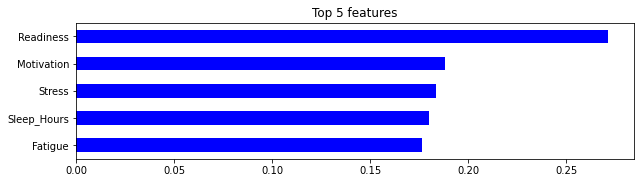

In [543]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [544]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.show()

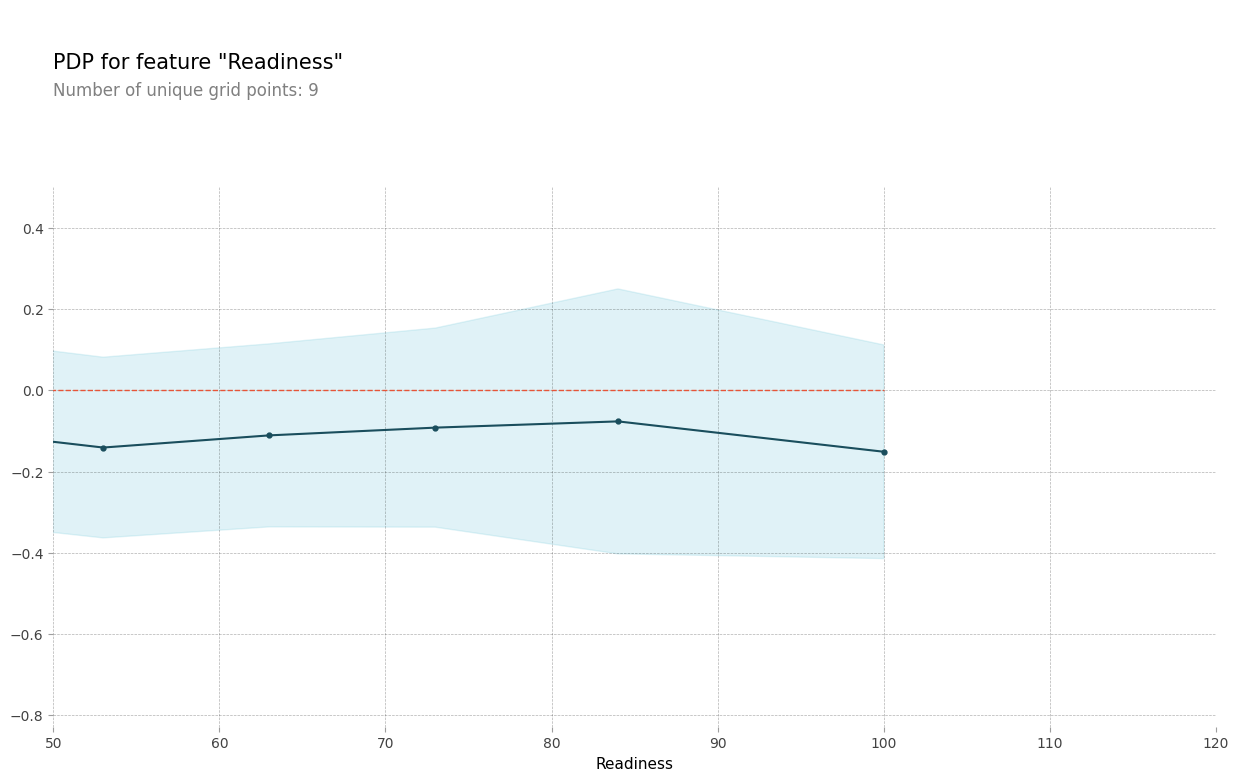

In [546]:
from pdpbox.pdp import pdp_isolate, pdp_plot

# Designate feature to analyze
feature = 'Readiness'

# Instantiate isolated conditional plot
isolated = pdp_isolate(
    model=model,
    dataset=X_train_encoded,
    model_features=X_train_encoded.columns,
    feature=feature
)
# Visualize pdp plot
pdp_plot(isolated, feature_name=feature)
plt.xlim((50, 120));

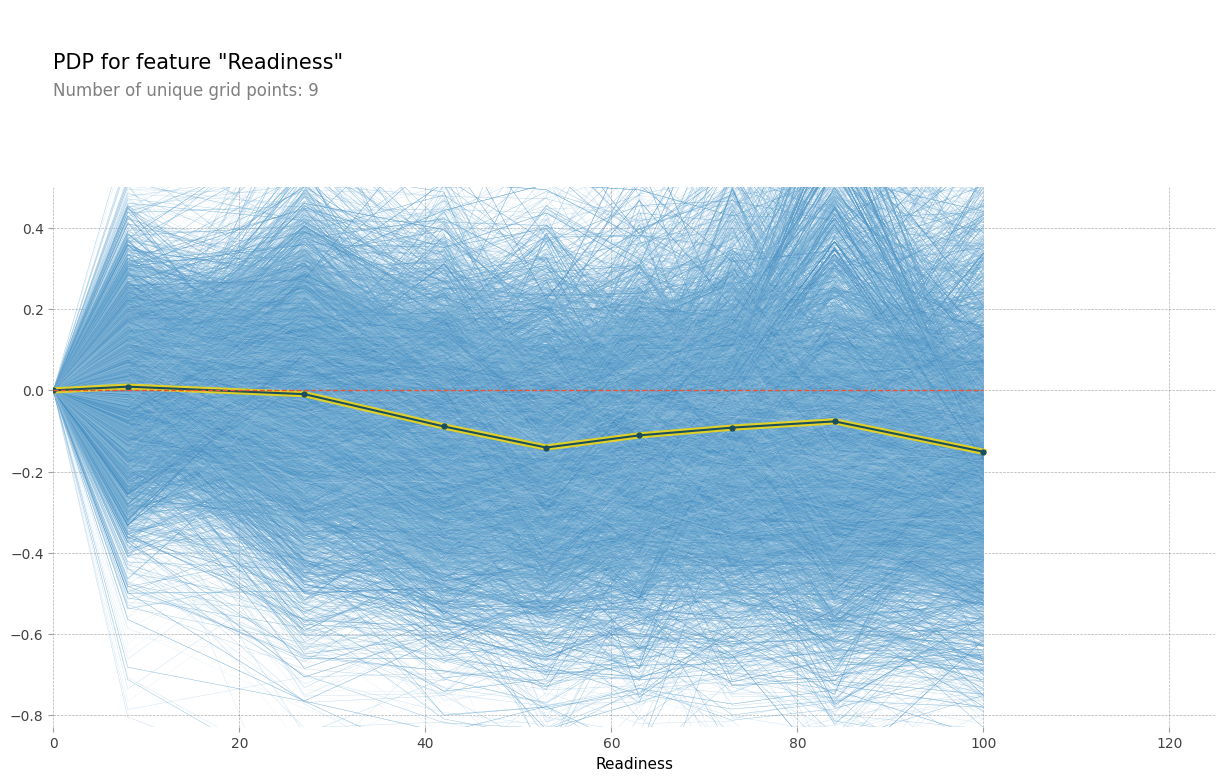

In [547]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=0.1)

plt.xlim(0,125);

In [548]:
# Partial Dependence Plots w/ 2 features

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Readiness', 'Stress']

interaction = pdp_interact(
    model=model,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

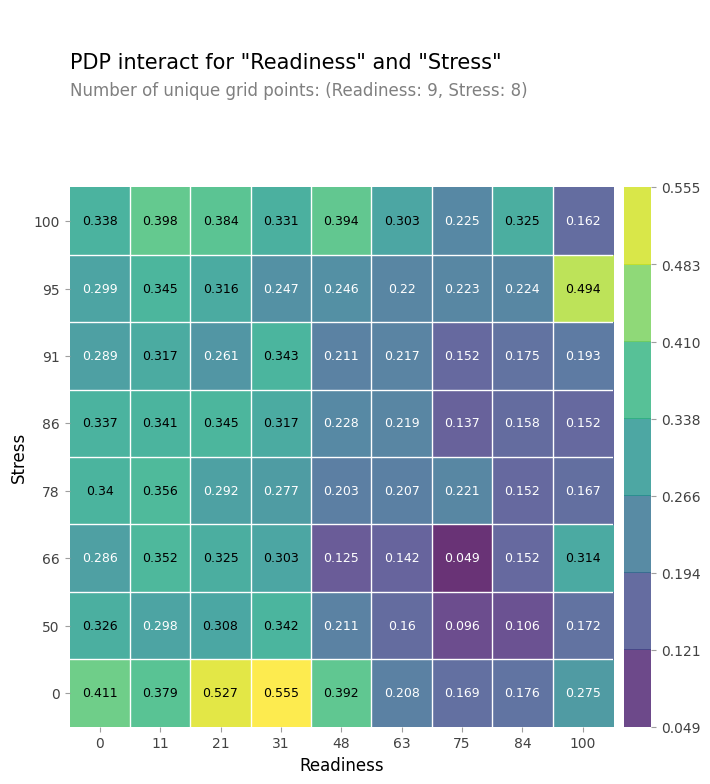

In [549]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [550]:
import shap
# Instantiate individual prediction
row = X_train_encoded.iloc[[0]]

# Instantiate TreeExplainer
explainer = shap.TreeExplainer(model)

# Pull shap values for individual observation
shap_values = explainer.shap_values(row)

# Visualize feature importance on individual prediction
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)